In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import scipy as sc
import kafe2 
from uncertainties import ufloat
from uncertainties import unumpy as unp
import scipy.optimize as opt

# Bissle plotting

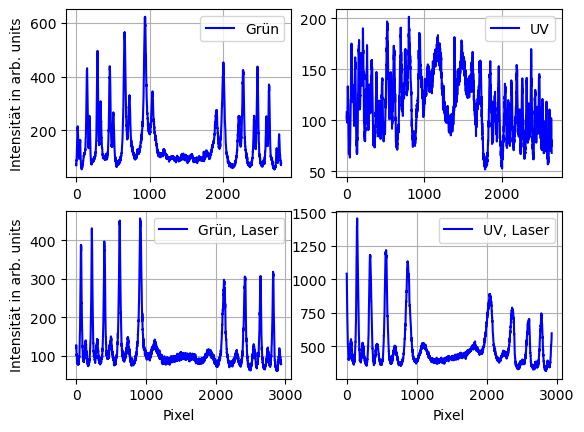

In [3]:
gruen_df = pd.read_csv("Ergebnisse/gruen.csv")
gruen_laser_df = pd.read_csv("Ergebnisse/laser_gruen.csv")
uv_df = pd.read_csv("Ergebnisse/uv.csv")
uv_laser_df = pd.read_csv("Ergebnisse/laser2_uv.csv")

gruen = np.array([gruen_df["X"], gruen_df["Y"]])
gruen_laser = np.array([gruen_laser_df["X"], gruen_laser_df["Y"]])
uv = np.array([uv_df["X"], uv_df["Y"]])
uv_laser = np.array([uv_laser_df["X"], uv_laser_df["Y"]])

fig0, ax0 = plt.subplots(2,2)
ax0[0][0].plot( gruen[0] , gruen[1] , color="blue" , label="Grün")
ax0[1][0].plot( gruen_laser[0] , gruen_laser[1] , color="blue" , label="Grün, Laser")
ax0[0][1].plot( uv[0] , uv[1] , color="blue" , label="UV")
ax0[1][1].plot( uv_laser[0] , uv_laser[1] , color="blue" , label="UV, Laser")

ax0[0][0].set(ylabel="Intensität in arb. units")
ax0[1][0].set(xlabel="Pixel" , ylabel="Intensität in arb. units")
ax0[1][1].set(xlabel="Pixel")

for i in range(2):
    for j in range(2): ax0[i][j].legend(), ax0[i][j].grid()


# Nützliche Funktionen

In [4]:
# Umrechnung von Pixel in Mikrometer
def um(px): return 3.45*px

# Gauss Funktion
def gauss(x,A,mu,std,c):
    return A*np.exp(-(x-mu)**2/(2*std**2)) + c

# Alle wichtigen Peaks finden für alle Intensitätsverteilungen

## Laser

Laser, Grün

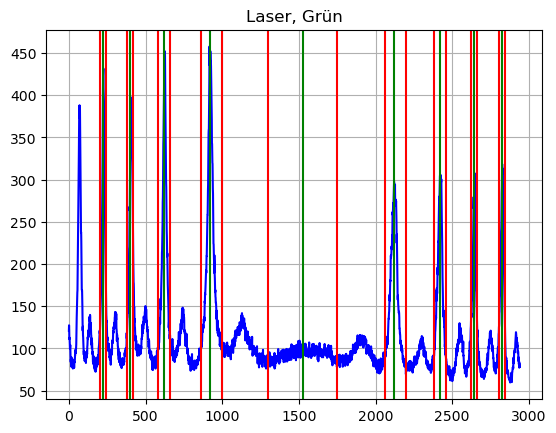

In [5]:
plt.plot( gruen_laser[0] , gruen_laser[1] , color="blue" , label="Laser, Grün")
# 4. Links
plt.axvline(x=225, color="green")
plt.axvline(x=205, color="red")
plt.axvline(x=245, color="red")

# 3. Links
plt.axvline(x=400, color="green")
plt.axvline(x=380, color="red")
plt.axvline(x=420, color="red")

# 2. Links
plt.axvline(x=620, color="green")
plt.axvline(x=580, color="red")
plt.axvline(x=660, color="red")

# 1. Links
plt.axvline(x=920, color="green")
plt.axvline(x=860, color="red")
plt.axvline(x=1000, color="red")


# 1. rechts
plt.axvline(x=2120, color="green")
plt.axvline(x=2060, color="red")
plt.axvline(x=2200, color="red")

# # 2. rechts
plt.axvline(x=2420, color="green")
plt.axvline(x=2380, color="red")
plt.axvline(x=2460, color="red")

# # 3. rechts
plt.axvline(x=2640, color="green")
plt.axvline(x=2620, color="red")
plt.axvline(x=2660, color="red")

# # 4. rechts
plt.axvline(x=2825, color="green")
plt.axvline(x=2805, color="red")
plt.axvline(x=2845, color="red")

# mitte
plt.axvline(x=1525, color="green")
plt.axvline(x=1300, color="red")
plt.axvline(x=1750, color="red")

plt.grid()
plt.title("Laser, Grün")
plt.show()

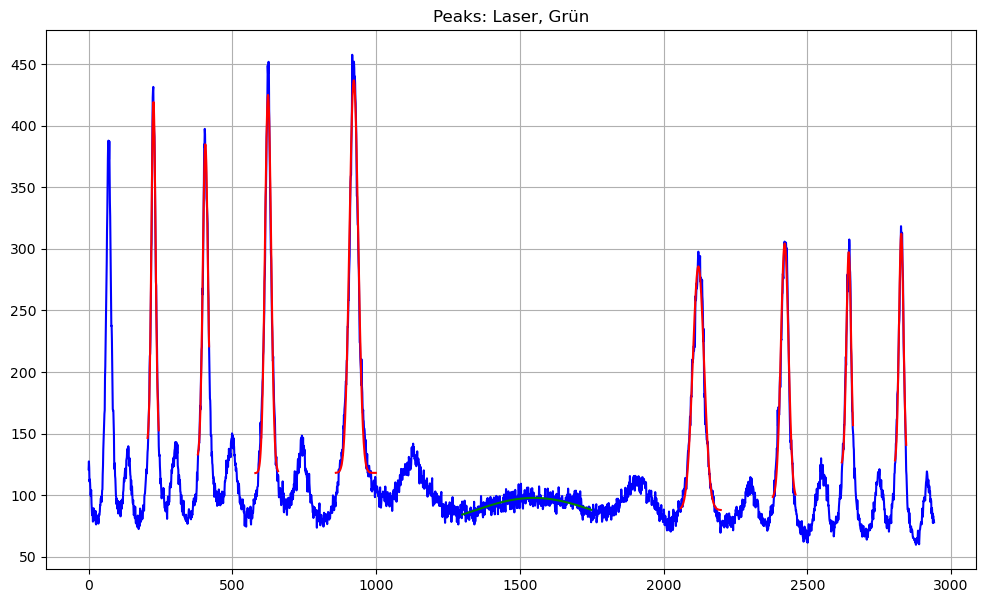

[4565.27967601 3942.64630401 3190.44580764 2161.01480869 1974.41062895
 3010.05677808 3778.54401984 4408.68028892] [24.86296645 31.02908877 37.05728543 52.52759128 68.01741214 45.54605021
 28.00900705 26.87892956]


In [26]:
# Array of arrays with start and stop indices for each peak
# from left to right
start_stop_gl = np.array([ [205,245] , [380,420] , [580,660] , [860,1000] ,
                        [2060,2200] , [2380,2460] , [2620,2660] , [2805,2845]
                      ])
# Arrays of arrays with initial guesses of the parameters
# A , mu , std , c
params_gl = np.array([ [350,225,20,100] , [300,400,20,100] , [350,620,40,100] , [350,920,70,100] ,
                    [200,2120,70,100] , [200,2420,40,100] , [200,2640,20,100] , [200,2825,20,100]
                  ])

plt.figure(figsize=(12,7))
plt.plot( gruen_laser[0] , gruen_laser[1] , color="blue" )

# gl: grün, laser
# speichere alle Fit-results in fit_res_gl liste
# die fits gehen von links nach rechts die peaks durch, genau wie start_stop_gl, params_gl
fit_res_gl = []

for i in range(len(start_stop_gl)):
    # curve_fit:
    # fit-Funktion, x-Achse im fit-Bereich, y-Achse im fit-Bereich, start Parameter
    fit_res_gl.append( 
        opt.curve_fit( gauss , gruen_laser[0][start_stop_gl[i][0]:start_stop_gl[i][1]] , gruen_laser[1][start_stop_gl[i][0]:start_stop_gl[i][1]] , params_gl[i])
                    )

for i in range(len(fit_res_gl)):
    plt.plot( gruen_laser[0][start_stop_gl[i][0]:start_stop_gl[i][1]] ,
              [ gauss(x , fit_res_gl[i][0][0] , fit_res_gl[i][0][1] , fit_res_gl[i][0][2] , fit_res_gl[i][0][3] ) for x in gruen_laser[0][start_stop_gl[i][0]:start_stop_gl[i][1]]] ,
              color="red"
             )

# Pixel Positionen der Maxima: Grün, laser
gl_pos = np.array([fit_res_gl[x][0][1] for x in range(len(fit_res_gl))])
gl_err = np.array([fit_res_gl[x][0][2] for x in range(len(fit_res_gl))])

# Finde exakten Mittelpunkt des Bildes
fit_mitte_gl = opt.curve_fit( gauss , gruen_laser[0][1300:1750] , gruen_laser[1][1300:1750] , [20,1525,225,80] )
plt.plot(gruen_laser[0][1300:1750] , [ gauss(x , fit_mitte_gl[0][0] , fit_mitte_gl[0][1] , fit_mitte_gl[0][2] , fit_mitte_gl[0][3] ) for x in gruen_laser[0][1300:1750]], color="green")
plt.grid()
plt.title("Peaks: Laser, Grün")
plt.show()

# abstände der maxima vom Mittelpunkt in mikrometern
gl_pos = np.abs(gl_pos - fit_mitte_gl[0][1]) * 3.45
gl_err = np.abs(gl_err) * 3.45
print(gl_pos, gl_err)

UV, Laser

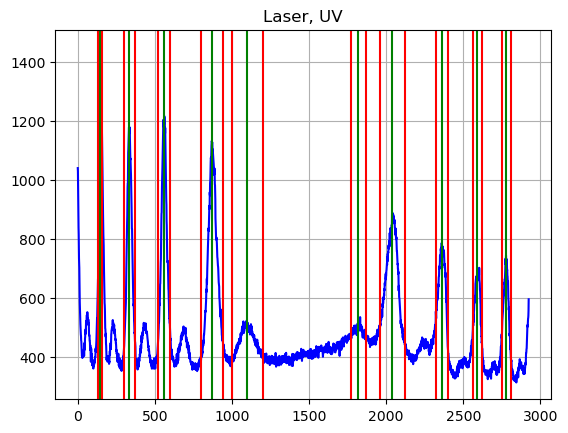

In [7]:
plt.plot( uv_laser[0] , uv_laser[1] , color="blue")
# 4. Links
plt.axvline(x=145, color="green")
plt.axvline(x=130, color="red")
plt.axvline(x=160, color="red")

# 3. Links
plt.axvline(x=335, color="green")
plt.axvline(x=300, color="red")
plt.axvline(x=370, color="red")

# 2. Links
plt.axvline(x=560, color="green")
plt.axvline(x=520, color="red")
plt.axvline(x=600, color="red")

# 1. Links
plt.axvline(x=870, color="green")
plt.axvline(x=800, color="red")
plt.axvline(x=940, color="red")


# 1. rechts
plt.axvline(x=2040, color="green")
plt.axvline(x=1960, color="red")
plt.axvline(x=2120, color="red")

# 2. rechts
plt.axvline(x=2360, color="green")
plt.axvline(x=2320, color="red")
plt.axvline(x=2400, color="red")

# 3. rechts
plt.axvline(x=2590, color="green")
plt.axvline(x=2560, color="red")
plt.axvline(x=2620, color="red")

# 4. rechts
plt.axvline(x=2780, color="green")
plt.axvline(x=2750, color="red")
plt.axvline(x=2810, color="red")

# mitte, links
plt.axvline(x=1100, color="green")
plt.axvline(x=1000, color="red")
plt.axvline(x=1200, color="red")
# mitte, rechts
plt.axvline(x=1820, color="green")
plt.axvline(x=1770, color="red")
plt.axvline(x=1870, color="red")

plt.grid()
plt.title("Laser, UV")
plt.show()

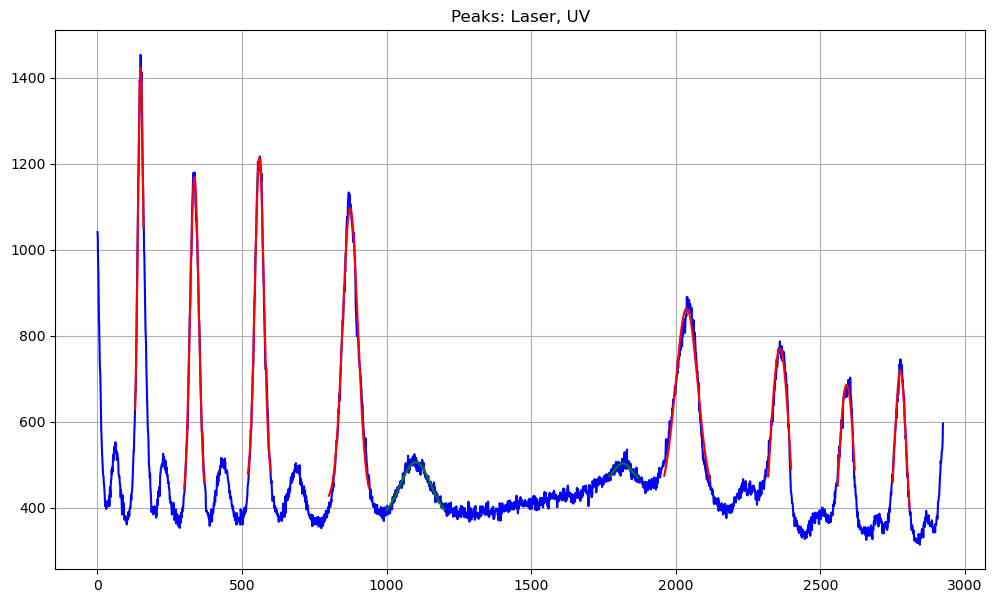

[4517.00985292 3875.14034087 3100.20391521 2016.95224844 1997.71080539
 3110.96640119 3906.93578295 4547.48775808] [ 33.10363934  52.11123433  53.50252451  89.97817218 131.97575855
 144.42204593 136.27639343  69.42893047]


In [30]:
# Array of arrays with start and stop indices for each peak
# from left to right
start_stop_ul = np.array([ [130,160] , [300,370] , [520,600] , [800,940] ,
                           [1960,2120] , [2320,2400] , [2560,2620] , [2750,2810]
                         ])
# Arrays of arrays with initial guesses of the parameters
# A , mu , std , c
params_ul = np.array([ [1000,145,15,400] , [800,335,35,400] , [800,560,40,400] , [700,870,70,400] ,
                       [500,2040,80,400] , [400,2360,40,400] , [400,2590,30,300] , [400,2780,30,300]
                     ])

plt.figure(figsize=(12,7))
plt.plot( uv_laser[0] , uv_laser[1] , color="blue" )

# ul: uv, laser
# speichere alle Fit-results in fit_res_ul liste
# die fits gehen von links nach rechts die peaks durch, genau wie start_stop_ul, params_ul
fit_res_ul = []
for i in range(len(start_stop_ul)):
    # curve_fit:
    # fit-Funktion, x-Achse im fit-Bereich, y-Achse im fit-Bereich, start Parameter
    fit_res_ul.append( 
        opt.curve_fit( gauss , uv_laser[0][start_stop_ul[i][0]:start_stop_ul[i][1]] , uv_laser[1][start_stop_ul[i][0]:start_stop_ul[i][1]] , params_ul[i])
                    )

for i in range(len(fit_res_ul)):
    plt.plot( uv_laser[0][start_stop_ul[i][0]:start_stop_ul[i][1]] ,
              [ gauss(x , fit_res_ul[i][0][0] , fit_res_ul[i][0][1] , fit_res_ul[i][0][2] , fit_res_ul[i][0][3] ) for x in uv_laser[0][start_stop_ul[i][0]:start_stop_ul[i][1]]] ,
              color="red"
             )

ul_pos = [fit_res_ul[x][0][1] for x in range(len(fit_res_ul))]
ul_err = [fit_res_ul[x][0][2] for x in range(len(fit_res_ul))]

fit_mitte_links_ul = opt.curve_fit( gauss , uv_laser[0][1000:1200] , uv_laser[1][1000:1200] , [100,1100,100,400] )
fit_mitte_rechts_ul = opt.curve_fit( gauss , uv_laser[0][1770:1870] , uv_laser[1][1770:1870] , [50,1820,50,450] )
plt.plot(uv_laser[0][1000:1200] , [ gauss(x , fit_mitte_links_ul[0][0] , fit_mitte_links_ul[0][1] , fit_mitte_links_ul[0][2] , fit_mitte_links_ul[0][3] ) for x in uv_laser[0][1000:1200]], color="green")
plt.plot(uv_laser[0][1770:1870] , [ gauss(x , fit_mitte_rechts_ul[0][0] , fit_mitte_rechts_ul[0][1] , fit_mitte_rechts_ul[0][2] , fit_mitte_rechts_ul[0][3] ) for x in uv_laser[0][1770:1870]], color="green")
plt.grid()
plt.title("Peaks: Laser, UV")
plt.show()

mitte_ul = fit_mitte_links_ul[0][1] + (fit_mitte_rechts_ul[0][1] - fit_mitte_links_ul[0][1])/2

# abstände der maxima vom Mittelpunkt in mikrometern
ul_pos = np.abs(ul_pos - mitte_ul) * 3.45
ul_err = np.abs(ul_err) * 3.45
print(ul_pos, ul_err)

In [9]:
# # Array of arrays with start and stop indices for each peak
# # from left to right
# start_stop = np.array([ [] , [] , [] , [] ,
#                         [] , [] , [] , []
#                       ])
# # Arrays of arrays with initial guesses of the parameters
# # A , mu , std , c
# params = np.array([ [] , [] , [] , [] ,
#                     [] , [] , [] , []
#                   ])

# plt.figure(figsize=(12,7))
# plt.plot( gruen_laser[0] , gruen_laser[1] , color="blue" )

# # gl: grün, laser
# # speichere alle Fit-results in fit_res_gl liste
# # die fits gehen von links nach rechts die peaks durch, genau wie start_stop, params
# fit_res_gl = []
# for i in range(len(start_stop)):
#     # curve_fit:
#     # fit-Funktion, x-Achse im fit-Bereich, y-Achse im fit-Bereich, start Parameter
#     fit_res_gl.append( 
#         opt.curve_fit( gauss , gruen_laser[0][start_stop[i][0]:start_stop[i][1]] , gruen_laser[1][start_stop[i][0]:start_stop[i][1]] , params[i])
#                     )

# for i in range(len(fit_res_gl)):
#     plt.plot( gruen_laser[0][start_stop[i][0]:start_stop[i][1]] ,
#               [ gauss(x , fit_res_gl[i][0][0] , fit_res_gl[i][0][1] , fit_res_gl[i][0][2] , fit_res_gl[i][0][3] ) for x in gruen_laser[0][start_stop[i][0]:start_stop[i][1]]] ,
#               color="red"
#              )

# gl_pos = [fit_res_gl[x][0][1] for x in range(len(fit_res_gl))]

# fit_mitte = opt.curve_fit( gauss , gruen_laser[0][1300:1750] , gruen_laser[1][1300:1750] , [20,1525,225,80] )
# plt.plot(gruen_laser[0][1300:1750] , [ gauss(x , fit_mitte[0][0] , fit_mitte[0][1] , fit_mitte[0][2] , fit_mitte[0][3] ) for x in gruen_laser[0][1300:1750]], color="green")
# plt.show()

# print(gl_pos)
# print(fit_mitte[0][1])

# # abstände der maxima vom Mittelpunkt in mikrometern
# gl_pos = np.abs(gl_pos - fit_mitte[0][1]) * 3.45
# print(gl_pos)

## Filter

Grün, UV-Block

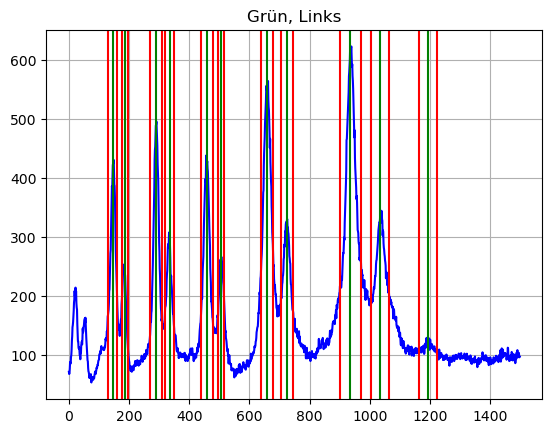

In [10]:
# 5 Ordnungen auf der linken Seite
plt.plot( gruen[0][:1500] , gruen[1][:1500] , color="blue")
# 5. Links, groß
plt.axvline(x=145, color="green")
plt.axvline(x=130, color="red")
plt.axvline(x=160, color="red")
# 5. Links, klein
plt.axvline(x=185, color="green")
plt.axvline(x=175, color="red")
plt.axvline(x=195, color="red")

# 4. Links, groß
plt.axvline(x=290, color="green")
plt.axvline(x=310, color="red")
plt.axvline(x=270, color="red")
# 4. Links, klein
plt.axvline(x=335, color="green")
plt.axvline(x=320, color="red")
plt.axvline(x=350, color="red")

# 3. Links, groß
plt.axvline(x=460, color="green")
plt.axvline(x=440, color="red")
plt.axvline(x=480, color="red")
# 3. Links, klein
plt.axvline(x=505, color="green")
plt.axvline(x=495, color="red")
plt.axvline(x=515, color="red")

# 2. Links, groß
plt.axvline(x=660, color="green")
plt.axvline(x=640, color="red")
plt.axvline(x=680, color="red")
# 2. Links, klein
plt.axvline(x=725, color="green")
plt.axvline(x=705, color="red")
plt.axvline(x=745, color="red")

# 1. Links, groß
plt.axvline(x=935, color="green")
plt.axvline(x=900, color="red")
plt.axvline(x=970, color="red")
# 1. Links, klein
plt.axvline(x=1035, color="green")
plt.axvline(x=1005, color="red")
plt.axvline(x=1065, color="red")

# Mitte links
plt.axvline(x=1195, color="green")
plt.axvline(x=1165, color="red")
plt.axvline(x=1225, color="red")

plt.grid()
plt.title("Grün, Links")
plt.show()

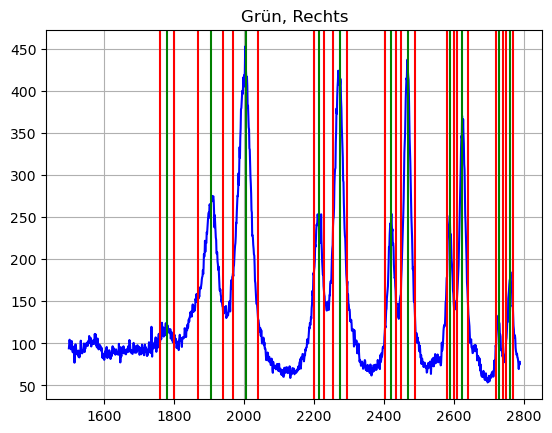

In [11]:
# 5 Ordungen auf der rechten Seite
plt.plot( gruen[0][1500:] , gruen[1][1500:] , color="blue")
# 1. rechts, groß
plt.axvline(x=2005, color="green")
plt.axvline(x=1970, color="red")
plt.axvline(x=2040, color="red")
# 1. rechts, klein
plt.axvline(x=1905, color="green")
plt.axvline(x=1870, color="red")
plt.axvline(x=1940, color="red")

# 2. rechts, groß
plt.axvline(x=2275, color="green")
plt.axvline(x=2255, color="red")
plt.axvline(x=2295, color="red")
# 2. rechts, klein
plt.axvline(x=2215, color="green")
plt.axvline(x=2200, color="red")
plt.axvline(x=2230, color="red")

# 3. rechts, groß
plt.axvline(x=2470, color="green")
plt.axvline(x=2450, color="red")
plt.axvline(x=2490, color="red")
# 3. rechts, klein
plt.axvline(x=2420, color="green")
plt.axvline(x=2405, color="red")
plt.axvline(x=2435, color="red")

# 4. rechts, groß
plt.axvline(x=2625, color="green")
plt.axvline(x=2610, color="red")
plt.axvline(x=2640, color="red")
# 4. rechts, klein
plt.axvline(x=2590, color="green")
plt.axvline(x=2580, color="red")
plt.axvline(x=2600, color="red")

# # 4. rechts, groß
plt.axvline(x=2760, color="green")
plt.axvline(x=2750, color="red")
plt.axvline(x=2770, color="red")
# 4. rechts, klein
plt.axvline(x=2730, color="green")
plt.axvline(x=2720, color="red")
plt.axvline(x=2740, color="red")

# Mitte rechts
plt.axvline(x=1780, color="green")
plt.axvline(x=1800, color="red")
plt.axvline(x=1760, color="red")

plt.grid()
plt.title("Grün, Rechts")
plt.show()

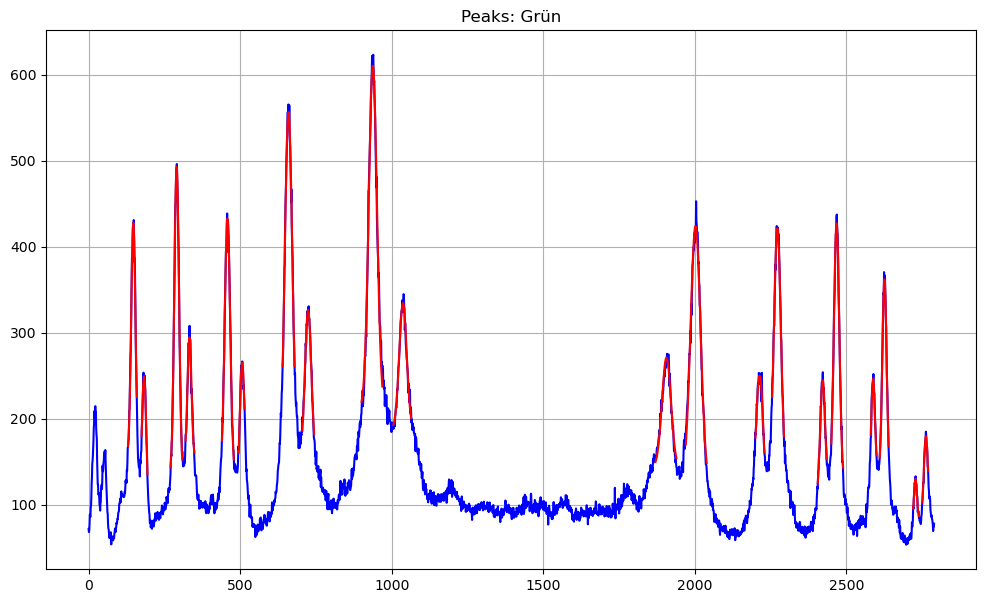

[147.45561984650553, 290.4061806833079, 457.94784846582894, 659.5062245515929, 937.6197244992154, 2002.0477106817916, 2272.1980968186967, 2467.3984875903757, 2625.328708418188, 2762.1248890751895]
[182.8819556989563, 332.77431451621754, 506.6275429247419, 724.1598164704722, 1037.0178172379708, 1906.205910831214, 2213.5038499294387, 2421.718609419186, 2588.0405477493528, 2727.754487541009]
1486.5425696292655
[4619.84997675 4126.67054186 3548.65178801 2853.27539052 1893.7838157
 1778.49273663 2710.5115688  3383.95291697 3928.81217882 4400.75900209] [24.0655174  26.74163454 31.3078999  43.36537836 46.10837729 57.23854437
 39.12610131 30.44845063 24.46813437 22.37341251]
[4497.62911806 3980.50048014 3380.70684213 2630.2204984  1550.86039575
 1447.83852715 2508.01641704 3226.35733728 3800.16802451 4282.1811168 ] [29.54163223 22.58471686 30.24558437 35.52814745 41.93666704 51.00918441
 52.83258682 28.76134608 20.48605691 15.97433743]


In [32]:
# Array of arrays with start and stop indices for each peak
# from left to right
# gg: grün, große Peaks
# gk: grün, kleine Peaks
start_stop_gg = np.array([ [130,160] , [270,310] , [440,480] , [640,680] , [900,970] ,
                           [1970,2040] , [2255,2295] , [2450,2490] , [2610,2640] , [2750,2770]
                        ])
start_stop_gk = np.array([ [175,195] , [320,350] , [495,515] , [705,745] , [1005,1065] ,
                           [1870,1940] , [2200,2230] , [2405,2435] , [2580,2600] , [2720,2740]
                        ])

# Arrays of arrays with initial guesses of the parameters
# A , mu , std , c
params_gg = np.array([ [300,145,15,150] , [350,290,20,150] , [300,460,20,150] , [300,660,20,250] , [400,935,35,200] ,
                       [300,2005,35,150] , [200,2275,20,200] , [300,2470,20,150] , [200,2625,15,150] , [80,2760,10,100]
                    ])
params_gk = np.array([ [100,185,10,150] , [150,335,15,150] , [50,505,10,200] , [100,725,20,200] , [150,1035,30,200] ,
                       [150,1905,35,150] , [100,2215,15,150] , [100,2420,15,150] , [100,2590,10,150] , [40,2730,10,90]
                    ])

plt.figure(figsize=(12,7))
plt.plot( gruen[0] , gruen[1] , color="blue" )

# # g: grün, UV-Filter
# # speichere alle Fit-results in fit_res_gg, fit_res_gk listen
# # die fits gehen von links nach rechts die peaks durch, genau wie start_stop, params
fit_res_gg = []
fit_res_gk = []
for i in range(len(start_stop_gg)):
    # curve_fit:
    # fit-Funktion, x-Achse im fit-Bereich, y-Achse im fit-Bereich, start Parameter
    fit_res_gg.append( 
                opt.curve_fit( gauss , gruen[0][start_stop_gg[i][0]:start_stop_gg[i][1]] , gruen[1][start_stop_gg[i][0]:start_stop_gg[i][1]] , params_gg[i])
    )
    fit_res_gk.append(
                opt.curve_fit( gauss , gruen[0][start_stop_gk[i][0]:start_stop_gk[i][1]] , gruen[1][start_stop_gk[i][0]:start_stop_gk[i][1]] , params_gk[i])
    )

for i in range(len(fit_res_gg)):
    plt.plot( gruen[0][start_stop_gg[i][0]:start_stop_gg[i][1]] ,
              [ gauss(x , fit_res_gg[i][0][0] , fit_res_gg[i][0][1] , fit_res_gg[i][0][2] , fit_res_gg[i][0][3] ) for x in gruen[0][start_stop_gg[i][0]:start_stop_gg[i][1]]] ,
              color="red"
    )
    plt.plot( gruen[0][start_stop_gk[i][0]:start_stop_gk[i][1]] ,
              [ gauss(x , fit_res_gk[i][0][0] , fit_res_gk[i][0][1] , fit_res_gk[i][0][2] , fit_res_gk[i][0][3] ) for x in gruen[0][start_stop_gk[i][0]:start_stop_gk[i][1]]] ,
              color="red"
    )

gg_pos = [fit_res_gg[x][0][1] for x in range(len(fit_res_gg))]
gk_pos = [fit_res_gk[x][0][1] for x in range(len(fit_res_gk))]

gg_err = [fit_res_gg[x][0][2] for x in range(len(fit_res_gg))]
gk_err = [fit_res_gk[x][0][2] for x in range(len(fit_res_gk))]

# g: grün
fit_mitte_links_g = opt.curve_fit( gauss , gruen[0][1165:1225] , gruen[1][1165:1225] , [25,1195,30,100] )
fit_mitte_rechts_g = opt.curve_fit( gauss , gruen[0][1760:1800] , gruen[1][1760:1800] , [20,1780,20,100] )
# plt.plot(gruen[0][1165:1225] , [ gauss(x , fit_mitte_links_g[0][0] , fit_mitte_links_g[0][1] , fit_mitte_links_g[0][2] , fit_mitte_links_g[0][3] ) for x in gruen[1][1165:1225]], color="green")
# plt.plot(gruen[0][1760:1800] , [ gauss(x , fit_mitte_rechts_g[0][0] , fit_mitte_rechts_g[0][1] , fit_mitte_rechts_g[0][2] , fit_mitte_rechts_g[0][3] ) for x in gruen[1][1760:1800]], color="green")
# print(fit_mitte_rechts_g)
plt.grid()
plt.title("Peaks: Grün")
plt.show()

print(gg_pos)
print(gk_pos)

mitte_g = fit_mitte_links_g[0][1] + (fit_mitte_rechts_g[0][1] - fit_mitte_links_g[0][1])/2
print(mitte_g)
# plt.axvline(x=mitte_g, color="black")

# # abstände der maxima vom Mittelpunkt in mikrometern
gg_pos = np.abs(gg_pos - mitte_g) * 3.45
gk_pos = np.abs(gk_pos - mitte_g) * 3.45

gg_err = np.abs(gg_err) * 3.45
gk_err = np.abs(gk_err) * 3.45

print(gg_pos, gg_err)
print(gk_pos, gk_err)

UV, Grün-Block

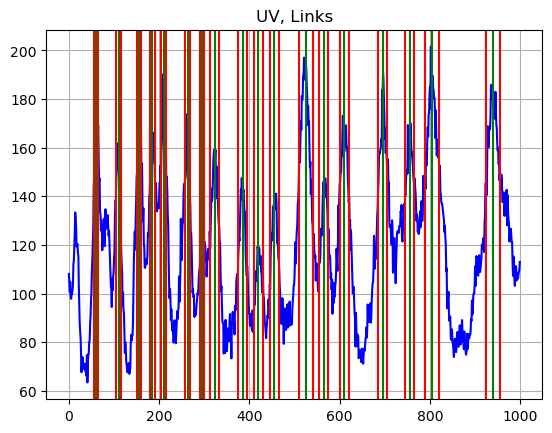

In [13]:
# 5 Ordnungen auf der linken Seite
plt.plot( uv[0][:1000] , uv[1][:1000] , color="blue")
# 1. Links, außen
plt.axvline(x=755, color="green")
plt.axvline(x=745, color="red")
plt.axvline(x=765, color="red")
# 1. Links, mitte
plt.axvline(x=805, color="green")
plt.axvline(x=790, color="red")
plt.axvline(x=820, color="red")
# 1. Links, innen
plt.axvline(x=940, color="green")
plt.axvline(x=955, color="red")
plt.axvline(x=925, color="red")

# 2. Links, außen
plt.axvline(x=565, color="green")
plt.axvline(x=555, color="red")
plt.axvline(x=575, color="red")
# 2. Links, mitte
plt.axvline(x=610, color="green")
plt.axvline(x=600, color="red")
plt.axvline(x=620, color="red")
# 2. Links, innen
plt.axvline(x=695, color="green")
plt.axvline(x=705, color="red")
plt.axvline(x=685, color="red")

# 3. Links, außen
plt.axvline(x=420, color="green")
plt.axvline(x=410, color="red")
plt.axvline(x=430, color="red")
# 3. Links, mitte
plt.axvline(x=455, color="green")
plt.axvline(x=445, color="red")
plt.axvline(x=465, color="red")
# 3. Links, innen
plt.axvline(x=525, color="green")
plt.axvline(x=510, color="red")
plt.axvline(x=540, color="red")

# # 4. Links, außen
plt.axvline(x=295, color="green")
plt.axvline(x=290, color="red")
plt.axvline(x=300, color="red")
# # 4. Links, mitte
plt.axvline(x=323, color="green")
plt.axvline(x=313, color="red")
plt.axvline(x=333, color="red")
# # 4. Links, innen
plt.axvline(x=385, color="green")
plt.axvline(x=375, color="red")
plt.axvline(x=395, color="red")

# # # 5. Links, außen
plt.axvline(x=185, color="green")
plt.axvline(x=180, color="red")
plt.axvline(x=190, color="red")
# # # 5. Links, mitte
plt.axvline(x=210, color="green")
plt.axvline(x=205, color="red")
plt.axvline(x=215, color="red")
# # # 5. Links, innen
plt.axvline(x=263, color="green")
plt.axvline(x=258, color="red")
plt.axvline(x=268, color="red")

# # 6. Links, außen
plt.axvline(x=60, color="green")
plt.axvline(x=55, color="red")
plt.axvline(x=65, color="red")
# # # 6. Links, mitte
plt.axvline(x=110, color="green")
plt.axvline(x=105, color="red")
plt.axvline(x=115, color="red")
# # # 6. Links, innen
plt.axvline(x=155, color="green")
plt.axvline(x=150, color="red")
plt.axvline(x=160, color="red")

plt.grid()
plt.title("UV, Links")
plt.show()

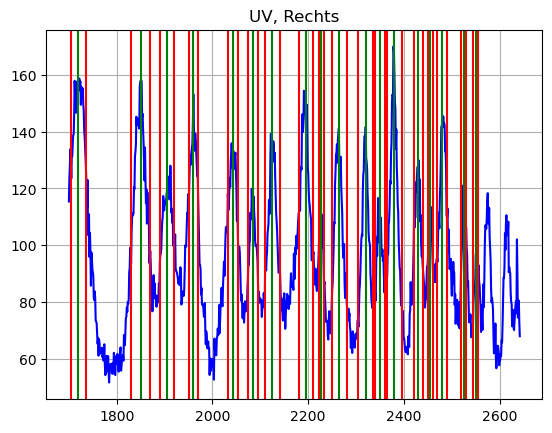

In [14]:
# 5 Ordnungen auf der linken Seite
plt.plot( uv[0][1700:] , uv[1][1700:] , color="blue")
# # 1. Links, außen
plt.axvline(x=1905, color="green")
plt.axvline(x=1890, color="red")
plt.axvline(x=1920, color="red")
# # 1. Links, mitte
plt.axvline(x=1850, color="green")
plt.axvline(x=1830, color="red")
plt.axvline(x=1870, color="red")
# # 1. Links, innen
plt.axvline(x=1720, color="green")
plt.axvline(x=1705, color="red")
plt.axvline(x=1735, color="red")

# 2. Links, außen
plt.axvline(x=2085, color="green")
plt.axvline(x=2075, color="red")
plt.axvline(x=2095, color="red")
# 2. Links, mitte
plt.axvline(x=2043, color="green")
plt.axvline(x=2033, color="red")
plt.axvline(x=2053, color="red")
# 2. Links, innen
plt.axvline(x=1960, color="green")
plt.axvline(x=1950, color="red")
plt.axvline(x=1970, color="red")

# 3. Links, außen
plt.axvline(x=2227, color="green")
plt.axvline(x=2222, color="red")
plt.axvline(x=2232, color="red")
# 3. Links, mitte
plt.axvline(x=2195, color="green")
plt.axvline(x=2180, color="red")
plt.axvline(x=2210, color="red")
# 3. Links, innen
plt.axvline(x=2125, color="green")
plt.axvline(x=2110, color="red")
plt.axvline(x=2140, color="red")

# 4. Links, außen
plt.axvline(x=2350, color="green")
plt.axvline(x=2340, color="red")
plt.axvline(x=2360, color="red")
# 4. Links, mitte
plt.axvline(x=2320, color="green")
plt.axvline(x=2305, color="red")
plt.axvline(x=2335, color="red")
# 4. Links, innen
plt.axvline(x=2265, color="green")
plt.axvline(x=2250, color="red")
plt.axvline(x=2280, color="red")

# 5. Links, außen
plt.axvline(x=2455, color="green")
plt.axvline(x=2450, color="red")
plt.axvline(x=2460, color="red")
# # 5. Links, mitte
plt.axvline(x=2430, color="green")
plt.axvline(x=2420, color="red")
plt.axvline(x=2440, color="red")
# # 5. Links, innen
plt.axvline(x=2380, color="green")
plt.axvline(x=2365, color="red")
plt.axvline(x=2395, color="red")

# 6. Links, außen
plt.axvline(x=2550, color="green")
plt.axvline(x=2545, color="red")
plt.axvline(x=2555, color="red")
# 6. Links, mitte
plt.axvline(x=2525, color="green")
plt.axvline(x=2520, color="red")
plt.axvline(x=2530, color="red")
# 6. Links, innen
plt.axvline(x=2480, color="green")
plt.axvline(x=2470, color="red")
plt.axvline(x=2490, color="red")

plt.grid()
plt.title("UV, Rechts")
plt.show()

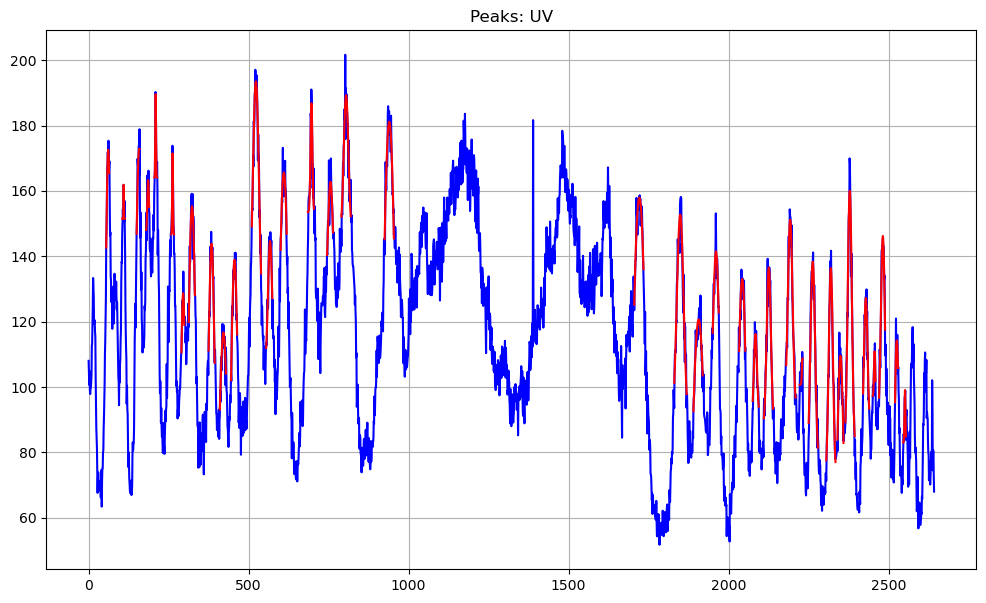

[4377.2783482  3946.87361757 3569.51106761 3135.11110823 2632.25665854
 1980.85711438 1988.47444627 2600.73687304 3107.10514718 3516.87106126
 3885.52331223 4212.60995614] [ 22.0380007    8.89264091  16.52236817  37.87638942  22.38415139
  25.40361829 114.3847664   15.95116109   5.56726922  35.46911576
   6.41336102   4.91147128]
[4210.72930027 3865.71524162 3473.57005809 3015.74958857 2483.81158538
 1812.8516378  1789.43568846 2458.17426319 2975.20812064 3413.21367966
 3790.62479511 4124.09973644] [9.20245936e-01 3.75625535e+00 6.18424050e+01 3.73710022e+01
 9.37791031e+02 2.50488632e+01 3.65080006e+01 9.45355167e+02
 2.56002201e+01 2.21024187e+01 1.93849810e+01 7.79630559e+02]
[4042.20662296 3683.05558457 3263.15778268 2785.24405296 2185.98661073
 1347.11798702 1348.79314477 2175.14361547 2744.57542128 3218.52994755
 3617.53375081 3974.12145771] [ 845.30428639    4.05695998   31.80363455   34.00878876    9.98466933
  113.82592051 1984.73293075   27.98758509   22.37806771   25.2219867

In [35]:
# Array of arrays with start and stop indices for each peak
# from left to right
# ua: UV, äußerer Ring, mittlerer in jedem Bunch
# um: UV, mittlerer Ring, innerer in jedem Bunch
# ui: UV, innerer Ring, äußerer in jedem Bunch

start_stop_ua = np.array([ [55,65] , [180,190] , [290,300] , [410,430] , [555,575] , [745,765] ,
                           [1890,1920] , [2075,2095] , [2222,2232] , [2340,2360] , [2450,2460] , [2545,2555]
                        ])
start_stop_um = np.array([ [105,114] , [205,215] , [313,333] , [445,465] , [600,620] , [790,820] ,
                           [1830,1870] , [2033,2053] , [2180,2210] , [2305,2335] , [2420,2440] , [2520,2530]
                        ])
start_stop_ui = np.array([ [150,160] , [258,268] , [375,395] , [510,540] , [685,705] , [925,955] ,
                           [1705,1735] , [1950,1970] , [2110,2140] , [2250,2280] , [2365,2395] , [2470,2490]
                        ])
# Arrays of arrays with initial guesses of the parameters
# A , mu , std , c
params_ua = np.array([ [30,60,5,150] , [10,185,5,150] , [15,295,5,115] , [20,420,10,100] , [35,565,10,115] , [20,755,10,145] ,
                       [30,1905,15,90] , [30,2085,10,90] , [20,2227,5,90] , [25,2350,10,85] , [20,2455,5,90] , [20,2550,5,80]
                    ])
params_um = np.array([ [30,110,5,130] , [30,210,5,160] , [30,323,10,130] , [30,455,10,110] , [20,610,10,140] , [40,805,15,150] ,
                       [70,1850,20,90] , [20,2043,10,100] , [35,2195,15,100] , [70,2320,15,70] , [40,2430,10,90] , [15,2525,5,100]
                    ])
params_ui = np.array([ [20,155,5,150] , [30,263,5,140] , [10,385,10,130] , [50,525,15,140] , [30,695,10,150] , [30,940,15,150] ,
                       [30,1720,15,130] , [30,1960,10,120] , [45,2125,15,90] , [60,2265,15,80] , [90,2380,15,80] , [40,2480,10,100]
                    ])

plt.figure(figsize=(12,7))
plt.plot( uv[0] , uv[1] , color="blue" )


# # speichere alle Fit-results in fit_res_gl liste
# # die fits gehen von links nach rechts die peaks durch, genau wie start_stop, params
fit_res_ua = []
fit_res_um = []
fit_res_ui = []
for i in range(len(start_stop_ua)):
    # curve_fit:
    # fit-Funktion, x-Achse im fit-Bereich, y-Achse im fit-Bereich, start Parameter
    fit_res_ua.append( 
                opt.curve_fit( gauss , uv[0][start_stop_ua[i][0]:start_stop_ua[i][1]] , uv[1][start_stop_ua[i][0]:start_stop_ua[i][1]] , params_ua[i])
    )
    fit_res_um.append( 
                opt.curve_fit( gauss , uv[0][start_stop_um[i][0]:start_stop_um[i][1]] , uv[1][start_stop_um[i][0]:start_stop_um[i][1]] , params_um[i])
    )
    fit_res_ui.append( 
                opt.curve_fit( gauss , uv[0][start_stop_ui[i][0]:start_stop_ui[i][1]] , uv[1][start_stop_ui[i][0]:start_stop_ui[i][1]] , params_ui[i])
    )

for i in range(len(fit_res_ua)):
    plt.plot( uv[0][start_stop_ua[i][0]:start_stop_ua[i][1]] ,
              [ gauss(x , fit_res_ua[i][0][0] , fit_res_ua[i][0][1] , fit_res_ua[i][0][2] , fit_res_ua[i][0][3] ) for x in uv[0][start_stop_ua[i][0]:start_stop_ua[i][1]]] ,
              color="red"
    )
    plt.plot( uv[0][start_stop_um[i][0]:start_stop_um[i][1]] ,
              [ gauss(x , fit_res_um[i][0][0] , fit_res_um[i][0][1] , fit_res_um[i][0][2] , fit_res_um[i][0][3] ) for x in uv[0][start_stop_um[i][0]:start_stop_um[i][1]]] ,
              color="red"
    )
    plt.plot( uv[0][start_stop_ui[i][0]:start_stop_ui[i][1]] ,
              [ gauss(x , fit_res_ui[i][0][0] , fit_res_ui[i][0][1] , fit_res_ui[i][0][2] , fit_res_ui[i][0][3] ) for x in uv[0][start_stop_ui[i][0]:start_stop_ui[i][1]]] ,
              color="red"
    )

ua_pos = [fit_res_ua[x][0][1] for x in range(len(fit_res_ua))]
um_pos = [fit_res_um[x][0][1] for x in range(len(fit_res_um))]
ui_pos = [fit_res_ui[x][0][1] for x in range(len(fit_res_ui))]

ua_err = [fit_res_ua[x][0][2] for x in range(len(fit_res_ua))]
um_err = [fit_res_um[x][0][2] for x in range(len(fit_res_um))]
ui_err = [fit_res_ui[x][0][2] for x in range(len(fit_res_ui))]

# genau die Mitte zwischen den ersten beiden inneren Ringen, ab denen gezählt wird
mitte_u = 940 + (1720-940)/2
plt.grid()
plt.title("Peaks: UV")
plt.show()

# # abstände der maxima vom Mittelpunkt in mikrometern
ua_pos = np.abs(ua_pos - mitte_u*np.ones(np.size(ua_pos))) * 3.45
um_pos = np.abs(um_pos - mitte_u*np.ones(np.size(um_pos))) * 3.45
ui_pos = np.abs(ui_pos - mitte_u*np.ones(np.size(ui_pos))) * 3.45

ua_err = np.abs(ua_err) * 3.45
um_err = np.abs(um_err) * 3.45
ui_err = np.abs(ui_err) * 3.45

print(ua_pos, ua_err)
print(um_pos, um_err)
print(ui_pos, ui_err)